In [1]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 1: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


This is the model without any constraints on kernel or col norms. We want to see what value the col_norms_mean settles to to set these constraints at 80% of the value.

In [135]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/quicker_learning_1_fc_layer_experiment_no_norms_repeat_recent.pkl")

In [67]:
def make_curves(model, *args):
    curves = None
    for c in args:
        channel = m.monitor.channels[c]
        c = c[0].upper() + c[1:]
        if not curves:
            curves = hl.Curve(zip(channel.example_record,channel.val_record),group=c)
        else:
            curves += hl.Curve(zip(channel.example_record,channel.val_record),group=c)
    return curves

Plot all col_norms in the fully connected and softmax composite layers.

Train_h4_col_norms_mean   
      I : Curve.Train_h4_col_norms_mean   (y)
   Train_y_y_1_col_norms_mean
      I : Curve.Train_y_y_1_col_norms_mean   (y)
   Train_y_y_2_col_norms_mean
      I : Curve.Train_y_y_2_col_norms_mean   (y)
   Train_y_y_3_col_norms_mean
      I : Curve.Train_y_y_3_col_norms_mean   (y)
   Train_y_y_4_col_norms_mean
      I : Curve.Train_y_y_4_col_norms_mean   (y)
   Train_y_y_5_col_norms_mean
      I : Curve.Train_y_y_5_col_norms_mean   (y)
   Train_y_y_6_col_norms_mean
      I : Curve.Train_y_y_6_col_norms_mean   (y)
   Valid_h4_col_norms_mean   
      I : Curve.Valid_h4_col_norms_mean   (y)
   Valid_y_y_1_col_norms_mean
      I : Curve.Valid_y_y_1_col_norms_mean   (y)
   Valid_y_y_2_col_norms_mean
      I : Curve.Valid_y_y_2_col_norms_mean   (y)
   Valid_y_y_3_col_norms_mean
      I : Curve.Valid_y_y_3_col_norms_mean   (y)
   Valid_y_y_4_col_norms_mean
      I : Curve.Valid_y_y_4_col_norms_mean   (y)
   Valid_y_y_5_col_norms_mean
      I : Curve.Valid_y_y_5_col_norms_mean   (y)
   Valid_y_y_6_col_norms_mean
      I : Curve.Valid_y_y_6_col_norms_mean   (y)
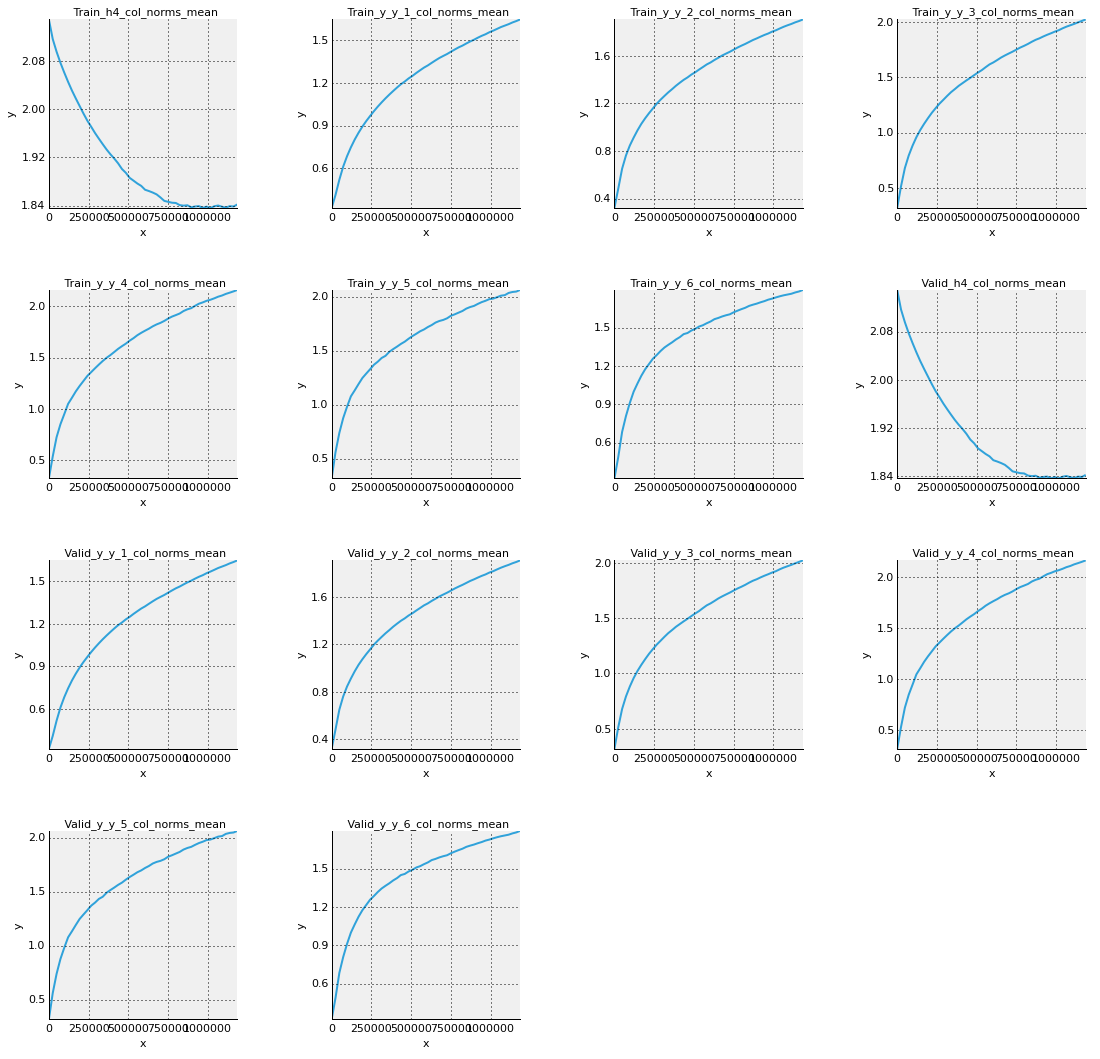

In [68]:
means = [c for c in sorted(m.monitor.channels.keys()) if "mean" in c and "norm" in c and "col" in c]
make_curves(m,*means)

Plot all kernel_norms_mean in convolutional layers.

Train_h1_kernel_norms_mean
      I : Curve.Train_h1_kernel_norms_mean   (y)
   Train_h2_kernel_norms_mean
      I : Curve.Train_h2_kernel_norms_mean   (y)
   Train_h3_kernel_norms_mean
      I : Curve.Train_h3_kernel_norms_mean   (y)
   Valid_h1_kernel_norms_mean
      I : Curve.Valid_h1_kernel_norms_mean   (y)
   Valid_h2_kernel_norms_mean
      I : Curve.Valid_h2_kernel_norms_mean   (y)
   Valid_h3_kernel_norms_mean
      I : Curve.Valid_h3_kernel_norms_mean   (y)
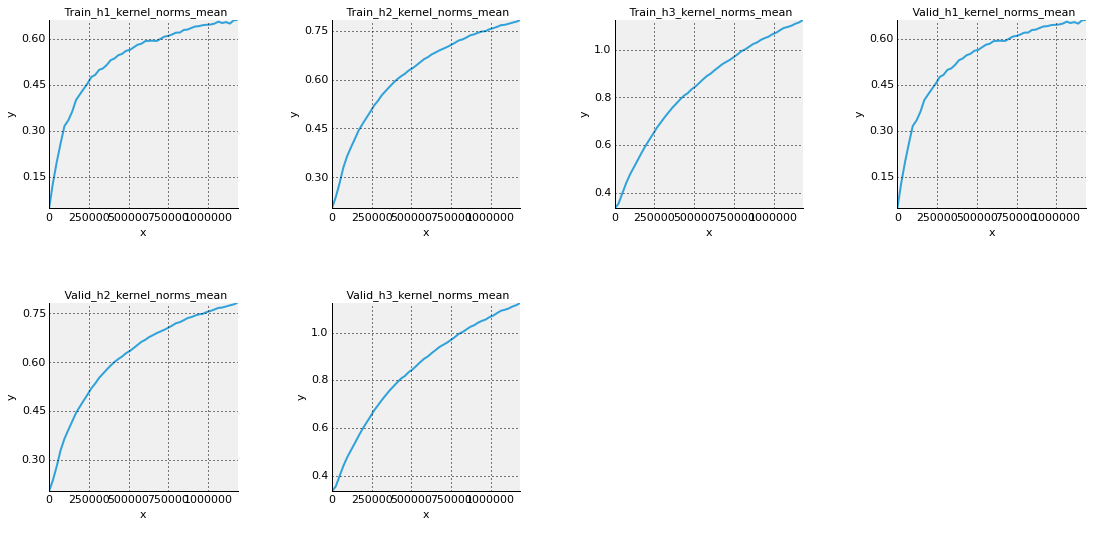

In [69]:
means = [c for c in sorted(m.monitor.channels.keys()) if "mean" in c and "norm" in c and "kernel" in c]
make_curves(m,*means)

We think that the first (and in this model - the only) fully connected layer is indicative of the value we're after.

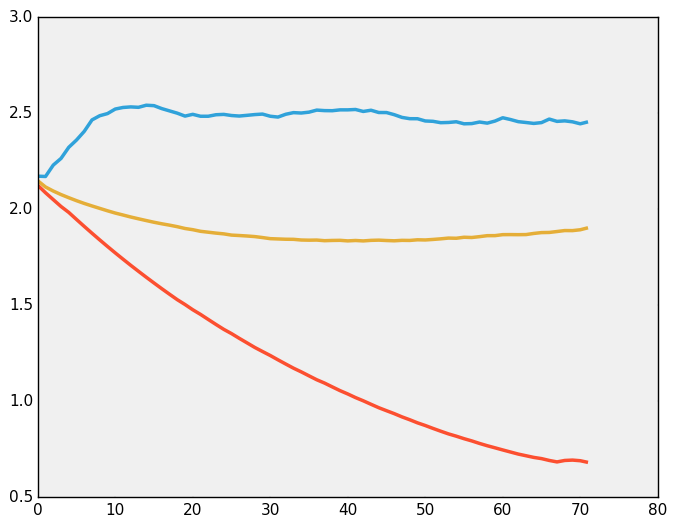

In [136]:
channel = m.monitor.channels["train_h4_col_norms_max"]
plt.plot(channel.epoch_record, channel.val_record)
channel = m.monitor.channels["train_h4_col_norms_min"]
plt.plot(channel.epoch_record, channel.val_record)
channel = m.monitor.channels["train_h4_col_norms_mean"]
plt.plot(channel.epoch_record, channel.val_record)

An attempt to find the saturating value of the mean by fitting a parabola to it and taking the min.

In [137]:
z = np.polyfit(channel.epoch_record, channel.val_record, 2)
p = np.poly1d(z)
sat = min(p(range(200)))
print(sat)

1.8264633639


In [138]:
sat * 0.8

1.4611706911165407

That's the 80%.

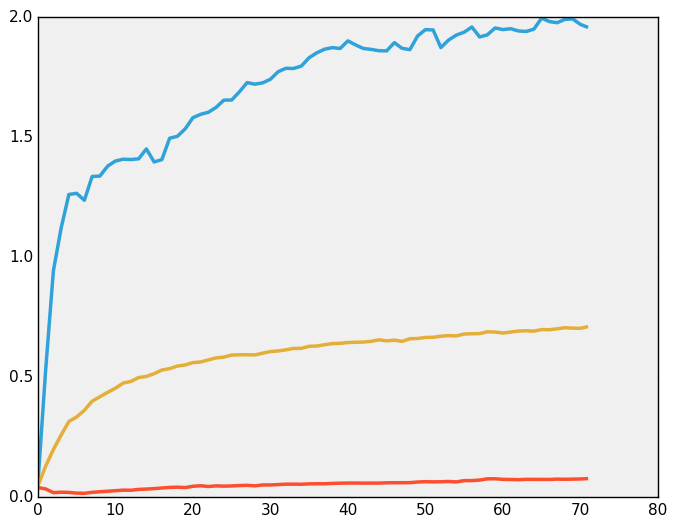

In [139]:
channel = m.monitor.channels["train_h1_kernel_norms_max"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_h1_kernel_norms_min"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_h1_kernel_norms_mean"]
plt.plot(channel.val_record)

In [140]:
z = np.polyfit(channel.epoch_record, channel.val_record, 2)
p = np.poly1d(z)
sat = max(p(range(200)))
sat

0.69939012883976481

In [141]:
sat * 0.8

0.55951210307181187

80% of layer 1 kernel_norm_mean

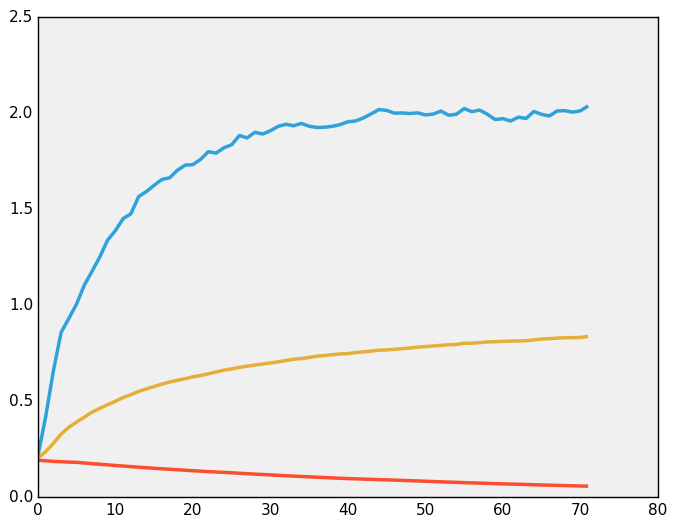

In [142]:
channel = m.monitor.channels["train_h2_kernel_norms_max"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_h2_kernel_norms_min"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_h2_kernel_norms_mean"]
plt.plot(channel.val_record)

In [143]:
z = np.polyfit(channel.epoch_record, channel.val_record, 2)
p = np.poly1d(z)
sat = max(p(range(200)))
sat

0.81916423981245789

In [144]:
sat * 0.8

0.65533139184996636

80% of layer 2 kernel_norm_mean

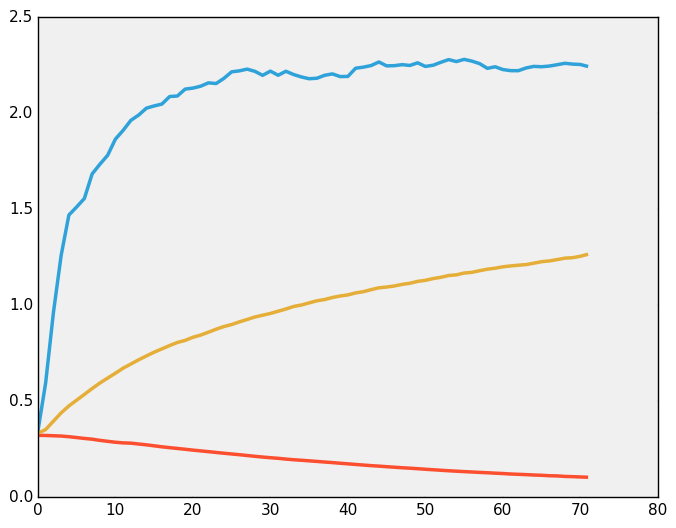

In [145]:
channel = m.monitor.channels["train_h3_kernel_norms_max"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_h3_kernel_norms_min"]
plt.plot(channel.val_record)
channel = m.monitor.channels["train_h3_kernel_norms_mean"]
plt.plot(channel.val_record)

In [146]:
z = np.polyfit(channel.epoch_record, channel.val_record, 2)
p = np.poly1d(z)
sat = max(p(range(200)))
sat

1.221272369224129

In [147]:
sat * 0.8

0.97701789537930317

80% of layer 2 kernel_norm_mean

Attempt to set the weights with Gavin. Went wrong.

In [186]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/experiment_setting_colnorms_recent.pkl")

Curve.Curve   (y)
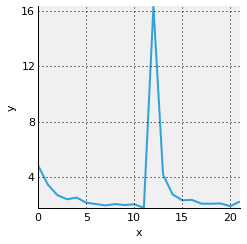

In [117]:
import neukrill_net.plotting as pl
pl.monitor_channels(m, ["valid_y_y_1_nll"], x_axis = "epoch")

HeatMap
      I       : HeatMap.HeatMap   (z)
      II      : HeatMap.HeatMap   (z)
      III     : HeatMap.HeatMap   (z)
      IV      : HeatMap.HeatMap   (z)
      V       : HeatMap.HeatMap   (z)
      VI      : HeatMap.HeatMap   (z)
      VII     : HeatMap.HeatMap   (z)
      VIII    : HeatMap.HeatMap   (z)
      IX      : HeatMap.HeatMap   (z)
      X       : HeatMap.HeatMap   (z)
      XI      : HeatMap.HeatMap   (z)
      XII     : HeatMap.HeatMap   (z)
      XIII    : HeatMap.HeatMap   (z)
      XIV     : HeatMap.HeatMap   (z)
      XV      : HeatMap.HeatMap   (z)
      XVI     : HeatMap.HeatMap   (z)
      XVII    : HeatMap.HeatMap   (z)
      XVIII   : HeatMap.HeatMap   (z)
      XIX     : HeatMap.HeatMap   (z)
      XX      : HeatMap.HeatMap   (z)
      XXI     : HeatMap.HeatMap   (z)
      XXII    : HeatMap.HeatMap   (z)
      XXIII   : HeatMap.HeatMap   (z)
      XXIV    : HeatMap.HeatMap   (z)
      XXV     : HeatMap.HeatMap   (z)
      XXVI    : HeatMap.HeatMap   (z)
      XXVII   : HeatMap.HeatMap   (z)
      XXVIII  : HeatMap.HeatMap   (z)
      XXIX    : HeatMap.HeatMap   (z)
      XXX     : HeatMap.HeatMap   (z)
      XXXI    : HeatMap.HeatMap   (z)
      XXXII   : HeatMap.HeatMap   (z)
      XXXIII  : HeatMap.HeatMap   (z)
      XXXIV   : HeatMap.HeatMap   (z)
      XXXV    : HeatMap.HeatMap   (z)
      XXXVI   : HeatMap.HeatMap   (z)
      XXXVII  : HeatMap.HeatMap   (z)
      XXXVIII : HeatMap.HeatMap   (z)
      XXXIX   : HeatMap.HeatMap   (z)
      XL      : HeatMap.HeatMap   (z)
      XLI     : HeatMap.HeatMap   (z)
      XLII    : HeatMap.HeatMap   (z)
      XLIII   : HeatMap.HeatMap   (z)
      XLIV    : HeatMap.HeatMap   (z)
      XLV     : HeatMap.HeatMap   (z)
      XLVI    : HeatMap.HeatMap   (z)
      XLVII   : HeatMap.HeatMap   (z)
      XLVIII  : HeatMap.HeatMap   (z)
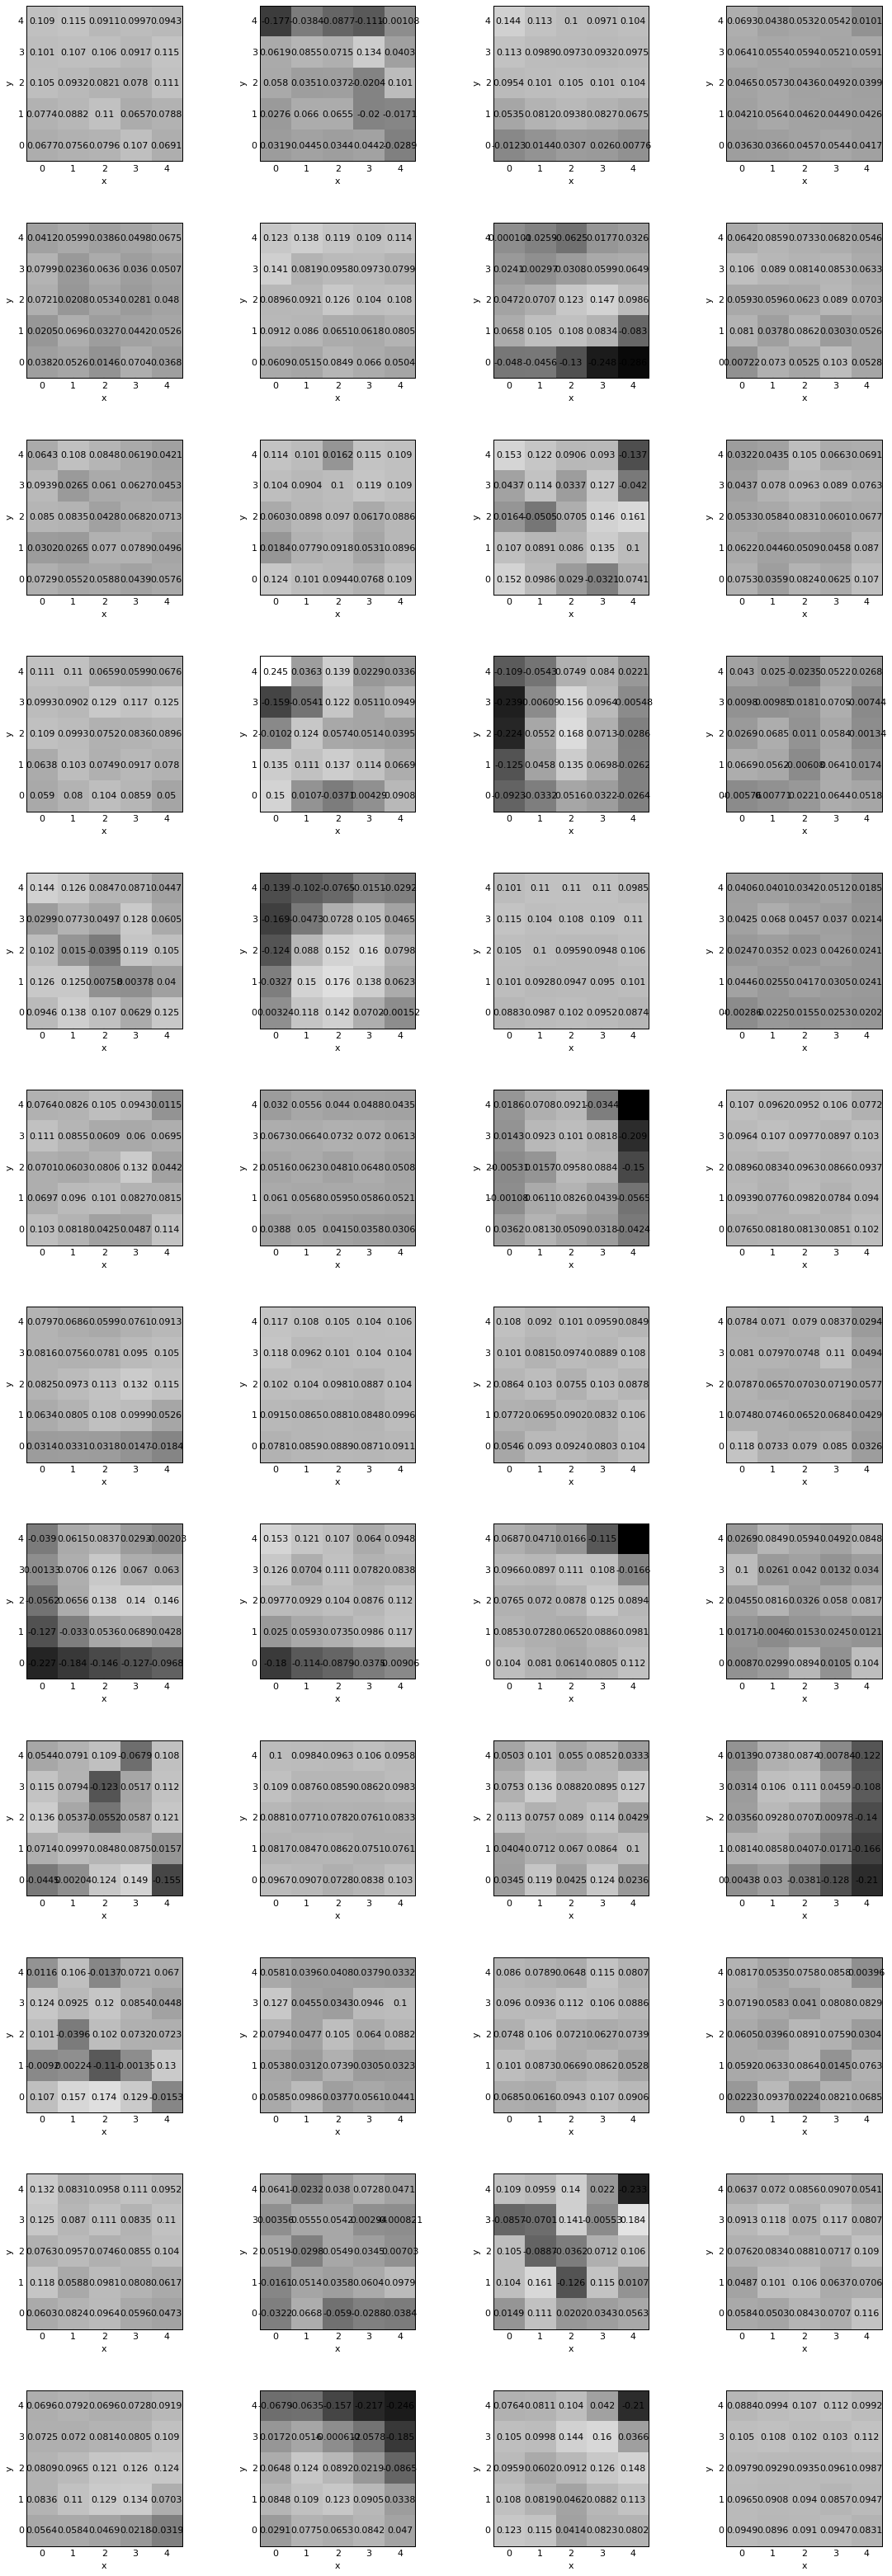

In [113]:
%%opts HeatMap style(cmap='gray')
pl.model_weights(m)

Train_y_y_2_row_norms_max
      I : Curve.Train_y_y_2_row_norms_max   (y)
   Train_h1_kernel_norms_max
      I : Curve.Train_h1_kernel_norms_max   (y)
   Train_h4_row_norms_max   
      I : Curve.Train_h4_row_norms_max   (y)
   Train_h4_col_norms_max   
      I : Curve.Train_h4_col_norms_max   (y)
   Train_y_y_4_col_norms_max
      I : Curve.Train_y_y_4_col_norms_max   (y)
   Train_h3_kernel_norms_max
      I : Curve.Train_h3_kernel_norms_max   (y)
   Train_h2_kernel_norms_max
      I : Curve.Train_h2_kernel_norms_max   (y)
   Train_y_y_4_row_norms_max
      I : Curve.Train_y_y_4_row_norms_max   (y)
   Train_y_y_2_col_norms_max
      I : Curve.Train_y_y_2_col_norms_max   (y)
   Train_y_y_5_col_norms_max
      I : Curve.Train_y_y_5_col_norms_max   (y)
   Train_y_y_3_col_norms_max
      I : Curve.Train_y_y_3_col_norms_max   (y)
   Train_y_y_3_row_norms_max
      I : Curve.Train_y_y_3_row_norms_max   (y)
   Train_y_y_1_row_norms_max
      I : Curve.Train_y_y_1_row_norms_max   (y)
   Train_y_y_1_col_norms_max
      I : Curve.Train_y_y_1_col_norms_max   (y)
   Train_y_y_6_row_norms_max
      I : Curve.Train_y_y_6_row_norms_max   (y)
   Train_y_y_6_col_norms_max
      I : Curve.Train_y_y_6_col_norms_max   (y)
   Train_y_y_5_row_norms_max
      I : Curve.Train_y_y_5_row_norms_max   (y)
   Valid_y_y_2_row_norms_max
      I : Curve.Valid_y_y_2_row_norms_max   (y)
   Valid_h1_kernel_norms_max
      I : Curve.Valid_h1_kernel_norms_max   (y)
   Valid_h4_row_norms_max   
      I : Curve.Valid_h4_row_norms_max   (y)
   Valid_h4_col_norms_max   
      I : Curve.Valid_h4_col_norms_max   (y)
   Valid_y_y_4_col_norms_max
      I : Curve.Valid_y_y_4_col_norms_max   (y)
   Valid_h3_kernel_norms_max
      I : Curve.Valid_h3_kernel_norms_max   (y)
   Valid_h2_kernel_norms_max
      I : Curve.Valid_h2_kernel_norms_max   (y)
   Valid_y_y_4_row_norms_max
      I : Curve.Valid_y_y_4_row_norms_max   (y)
   Valid_y_y_2_col_norms_max
      I : Curve.Valid_y_y_2_col_norms_max   (y)
   Valid_y_y_5_col_norms_max
      I : Curve.Valid_y_y_5_col_norms_max   (y)
   Valid_y_y_3_col_norms_max
      I : Curve.Valid_y_y_3_col_norms_max   (y)
   Valid_y_y_3_row_norms_max
      I : Curve.Valid_y_y_3_row_norms_max   (y)
   Valid_y_y_1_row_norms_max
      I : Curve.Valid_y_y_1_row_norms_max   (y)
   Valid_y_y_1_col_norms_max
      I : Curve.Valid_y_y_1_col_norms_max   (y)
   Valid_y_y_6_row_norms_max
      I : Curve.Valid_y_y_6_row_norms_max   (y)
   Valid_y_y_6_col_norms_max
      I : Curve.Valid_y_y_6_col_norms_max   (y)
   Valid_y_y_5_row_norms_max
      I : Curve.Valid_y_y_5_row_norms_max   (y)
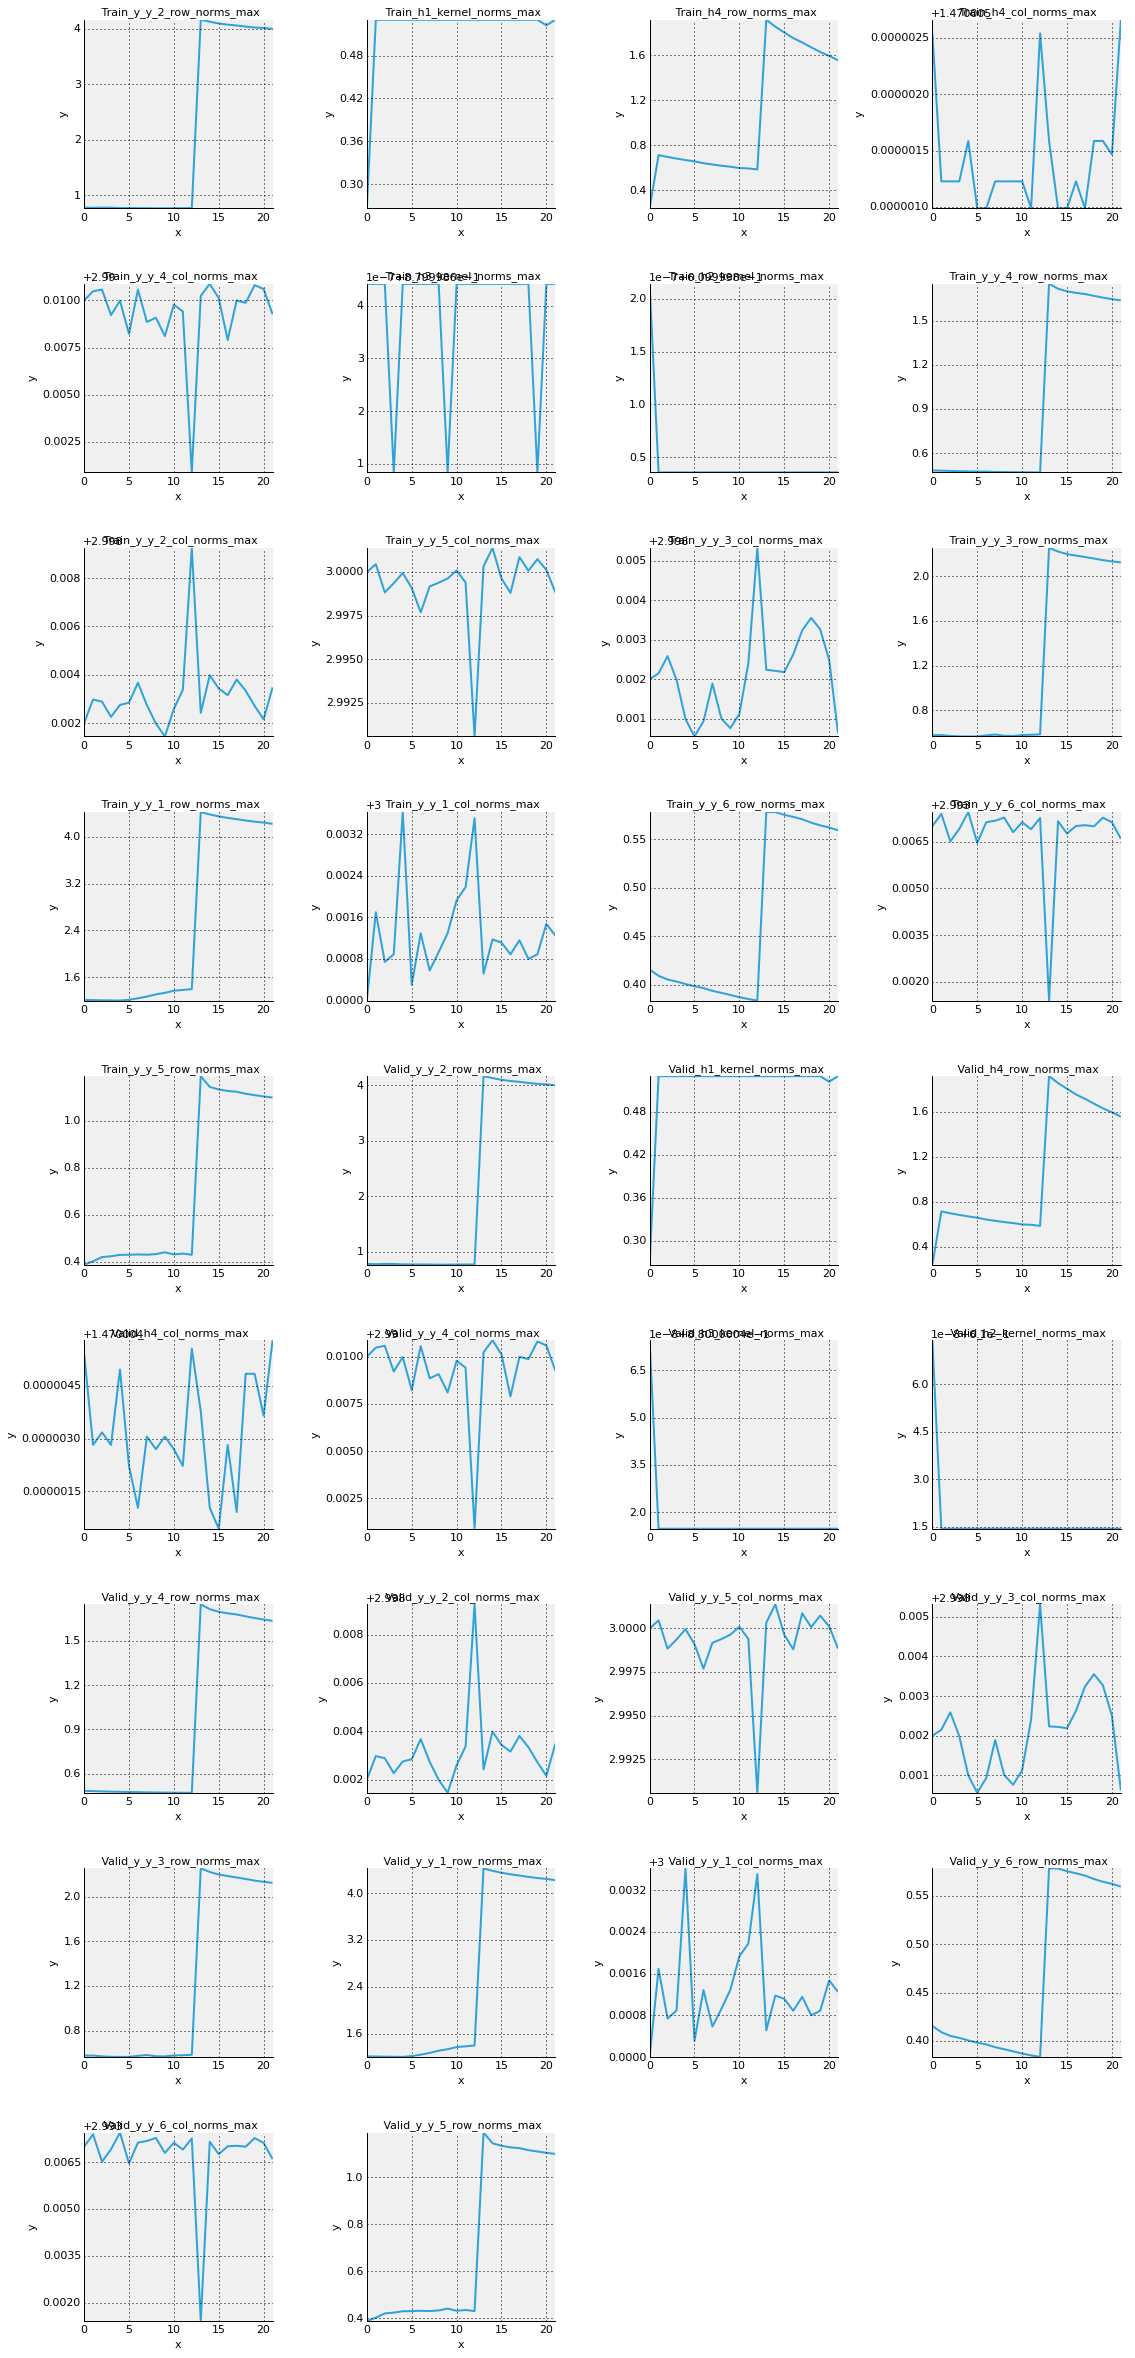

In [120]:
pl.monitor_channels(m, [c for c in m.monitor.channels if "norm" in c and "max" in c], x_axis = "epoch")

In [119]:
reload(pl)

<module 'neukrill_net.plotting' from '/afs/inf.ed.ac.uk/user/s13/s1320903/Neuroglycerin/neukrill-net-tools/neukrill_net/plotting.py'>

Attempt to set weights with Matt. Looks like it didn't break yet!

In [184]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/experiment_setting_colnorms_recent.pkl")

Curve.Valid_y_y_1_nll   (y)
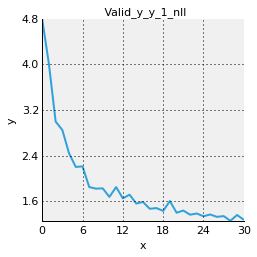

In [151]:
pl.monitor_channels(m, ["valid_y_y_1_nll"], x_axis = "epoch")

Train_y_y_2_row_norms_max
      I : Curve.Train_y_y_2_row_norms_max   (y)
   Train_h1_kernel_norms_max
      I : Curve.Train_h1_kernel_norms_max   (y)
   Train_h4_row_norms_max   
      I : Curve.Train_h4_row_norms_max   (y)
   Train_h4_col_norms_max   
      I : Curve.Train_h4_col_norms_max   (y)
   Train_y_y_4_col_norms_max
      I : Curve.Train_y_y_4_col_norms_max   (y)
   Train_h3_kernel_norms_max
      I : Curve.Train_h3_kernel_norms_max   (y)
   Train_h2_kernel_norms_max
      I : Curve.Train_h2_kernel_norms_max   (y)
   Train_y_y_4_row_norms_max
      I : Curve.Train_y_y_4_row_norms_max   (y)
   Train_y_y_2_col_norms_max
      I : Curve.Train_y_y_2_col_norms_max   (y)
   Train_y_y_5_col_norms_max
      I : Curve.Train_y_y_5_col_norms_max   (y)
   Train_y_y_3_col_norms_max
      I : Curve.Train_y_y_3_col_norms_max   (y)
   Train_y_y_3_row_norms_max
      I : Curve.Train_y_y_3_row_norms_max   (y)
   Train_y_y_1_row_norms_max
      I : Curve.Train_y_y_1_row_norms_max   (y)
   Train_y_y_1_col_norms_max
      I : Curve.Train_y_y_1_col_norms_max   (y)
   Train_y_y_6_row_norms_max
      I : Curve.Train_y_y_6_row_norms_max   (y)
   Train_y_y_6_col_norms_max
      I : Curve.Train_y_y_6_col_norms_max   (y)
   Train_y_y_5_row_norms_max
      I : Curve.Train_y_y_5_row_norms_max   (y)
   Valid_y_y_2_row_norms_max
      I : Curve.Valid_y_y_2_row_norms_max   (y)
   Valid_h1_kernel_norms_max
      I : Curve.Valid_h1_kernel_norms_max   (y)
   Valid_h4_row_norms_max   
      I : Curve.Valid_h4_row_norms_max   (y)
   Valid_h4_col_norms_max   
      I : Curve.Valid_h4_col_norms_max   (y)
   Valid_y_y_4_col_norms_max
      I : Curve.Valid_y_y_4_col_norms_max   (y)
   Valid_h3_kernel_norms_max
      I : Curve.Valid_h3_kernel_norms_max   (y)
   Valid_h2_kernel_norms_max
      I : Curve.Valid_h2_kernel_norms_max   (y)
   Valid_y_y_4_row_norms_max
      I : Curve.Valid_y_y_4_row_norms_max   (y)
   Valid_y_y_2_col_norms_max
      I : Curve.Valid_y_y_2_col_norms_max   (y)
   Valid_y_y_5_col_norms_max
      I : Curve.Valid_y_y_5_col_norms_max   (y)
   Valid_y_y_3_col_norms_max
      I : Curve.Valid_y_y_3_col_norms_max   (y)
   Valid_y_y_3_row_norms_max
      I : Curve.Valid_y_y_3_row_norms_max   (y)
   Valid_y_y_1_row_norms_max
      I : Curve.Valid_y_y_1_row_norms_max   (y)
   Valid_y_y_1_col_norms_max
      I : Curve.Valid_y_y_1_col_norms_max   (y)
   Valid_y_y_6_row_norms_max
      I : Curve.Valid_y_y_6_row_norms_max   (y)
   Valid_y_y_6_col_norms_max
      I : Curve.Valid_y_y_6_col_norms_max   (y)
   Valid_y_y_5_row_norms_max
      I : Curve.Valid_y_y_5_row_norms_max   (y)
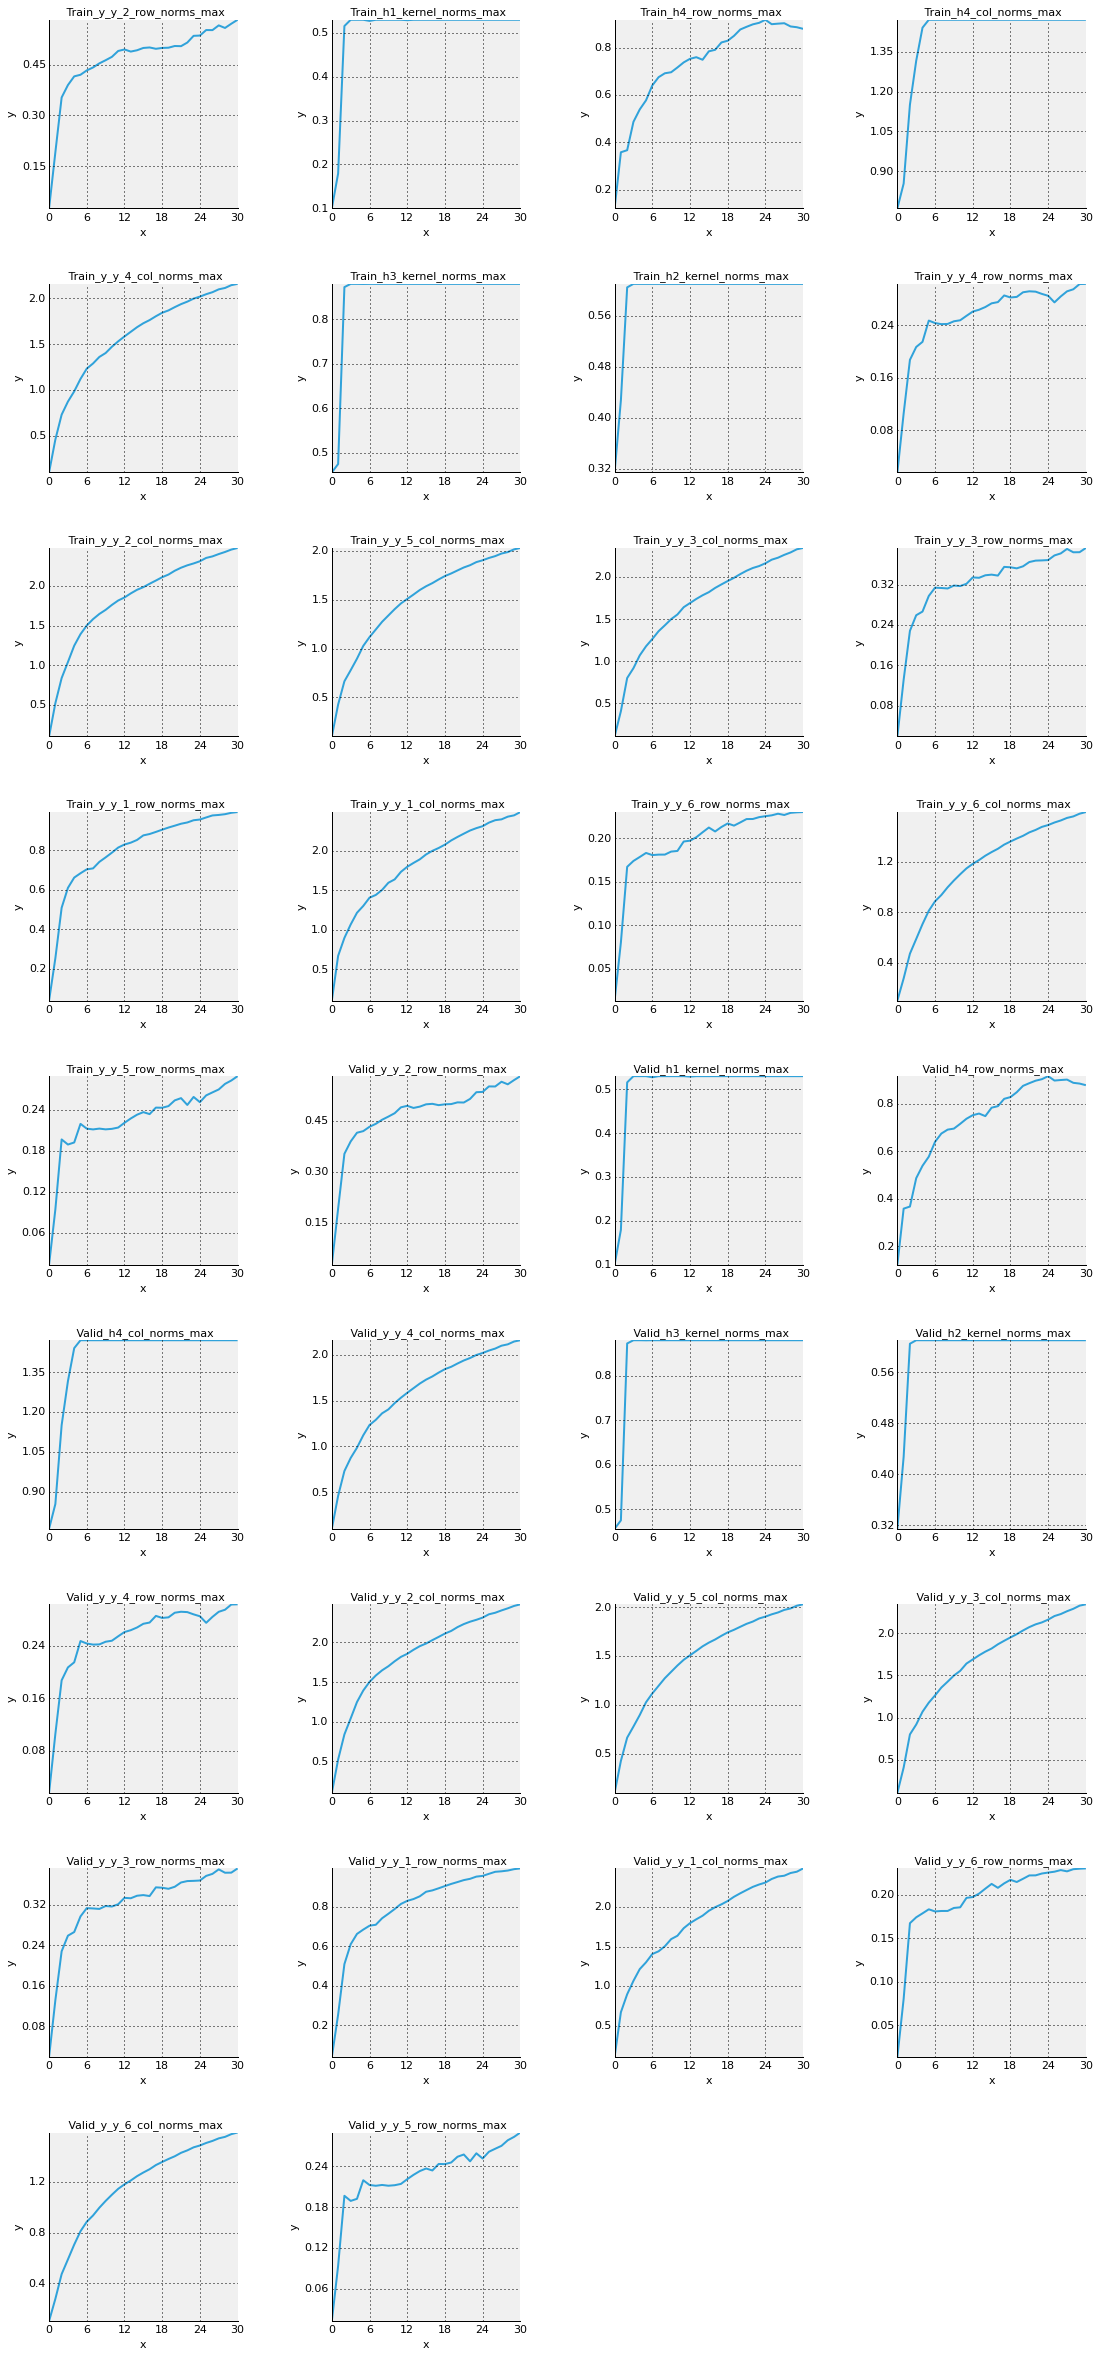

In [152]:
pl.monitor_channels(m, [c for c in m.monitor.channels if "norm" in c and "max" in c], x_axis = "epoch")

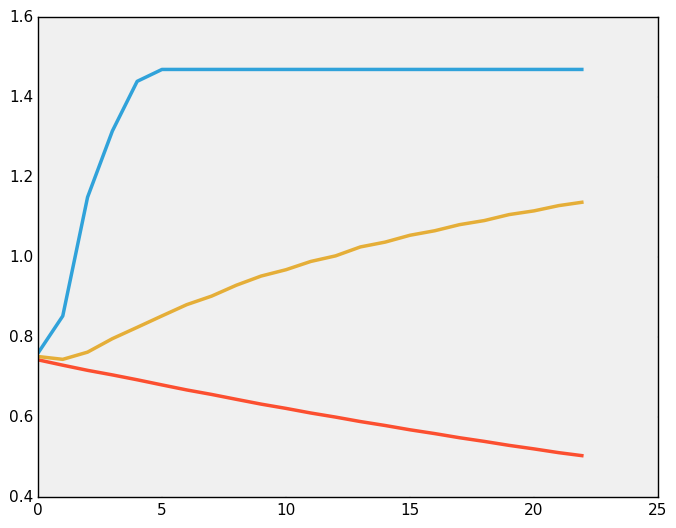

In [134]:
channel = m.monitor.channels["train_h4_col_norms_max"]
plt.plot(channel.epoch_record, channel.val_record)
channel = m.monitor.channels["train_h4_col_norms_min"]
plt.plot(channel.epoch_record, channel.val_record)
channel = m.monitor.channels["train_h4_col_norms_mean"]
plt.plot(channel.epoch_record, channel.val_record)

The same model with dropout set to 0.9.

In [183]:
m_drop = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/experiment_setting_colnorms_dropout_recent.pkl")

Valid_y_y_1_nll
      I : Curve.Valid_y_y_1_nll   (y)
   Train_y_y_1_nll
      I : Curve.Train_y_y_1_nll   (y)
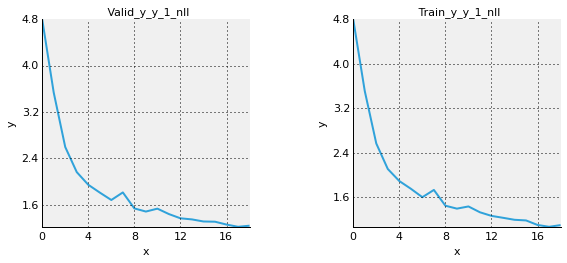

In [163]:
pl.monitor_channels(m_drop, ["valid_y_y_1_nll"], x_axis = "epoch") + pl.monitor_channels(m_drop, ["train_y_y_1_nll"], x_axis = "epoch")

Compare how fast the orginial and the dropout models are going down.

Valid_y_y_1_nll
      I  : Curve.Valid_y_y_1_nll   (y)
      II : Curve.Valid_y_y_1_nll   (y)
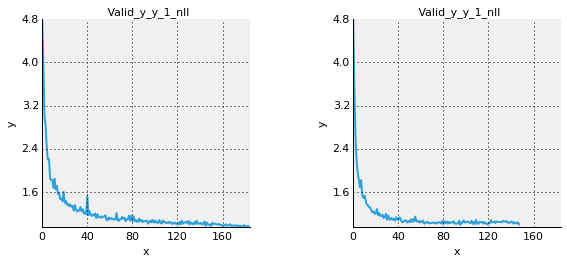

In [185]:
pl.monitor_channels(m, ["valid_y_y_1_nll"], x_axis = "epoch") + pl.monitor_channels(m_drop, ["valid_y_y_1_nll"], x_axis = "epoch")

The model with more augmentations and no dropout (set to 1).

In [175]:
m_aug = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/experiment_setting_colnorms_aug_recent.pkl")

Valid_y_y_1_nll
      I  : Curve.Valid_y_y_1_nll   (y)
      II : Curve.Valid_y_y_1_nll   (y)
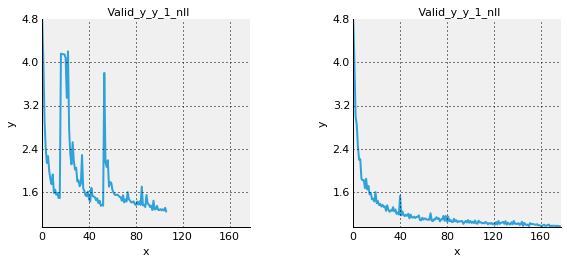

In [179]:
pl.monitor_channels(m_aug, ["valid_y_y_1_nll"], x_axis = "epoch") + pl.monitor_channels(m, ["valid_y_y_1_nll"], x_axis = "epoch")

Train_y_y_2_row_norms_mean
      I : Curve.Train_y_y_2_row_norms_mean   (y)
   Train_h4_col_norms_mean   
      I : Curve.Train_h4_col_norms_mean   (y)
   Train_y_y_1_row_norms_mean
      I : Curve.Train_y_y_1_row_norms_mean   (y)
   Train_y_y_6_col_norms_mean
      I : Curve.Train_y_y_6_col_norms_mean   (y)
   Train_y_y_3_col_norms_mean
      I : Curve.Train_y_y_3_col_norms_mean   (y)
   Train_y_y_5_col_norms_mean
      I : Curve.Train_y_y_5_col_norms_mean   (y)
   Train_y_y_5_row_norms_mean
      I : Curve.Train_y_y_5_row_norms_mean   (y)
   Train_h4_row_norms_mean   
      I : Curve.Train_h4_row_norms_mean   (y)
   Train_y_y_4_col_norms_mean
      I : Curve.Train_y_y_4_col_norms_mean   (y)
   Train_y_y_6_row_norms_mean
      I : Curve.Train_y_y_6_row_norms_mean   (y)
   Train_y_y_1_col_norms_mean
      I : Curve.Train_y_y_1_col_norms_mean   (y)
   Train_y_y_2_col_norms_mean
      I : Curve.Train_y_y_2_col_norms_mean   (y)
   Train_y_y_3_row_norms_mean
      I : Curve.Train_y_y_3_row_norms_mean   (y)
   Train_y_y_4_row_norms_mean
      I : Curve.Train_y_y_4_row_norms_mean   (y)
   Train_h2_kernel_norms_mean
      I : Curve.Train_h2_kernel_norms_mean   (y)
   Train_h3_kernel_norms_mean
      I : Curve.Train_h3_kernel_norms_mean   (y)
   Train_h1_kernel_norms_mean
      I : Curve.Train_h1_kernel_norms_mean   (y)
   Valid_y_y_2_row_norms_mean
      I : Curve.Valid_y_y_2_row_norms_mean   (y)
   Valid_h4_col_norms_mean   
      I : Curve.Valid_h4_col_norms_mean   (y)
   Valid_y_y_1_row_norms_mean
      I : Curve.Valid_y_y_1_row_norms_mean   (y)
   Valid_y_y_6_col_norms_mean
      I : Curve.Valid_y_y_6_col_norms_mean   (y)
   Valid_y_y_3_col_norms_mean
      I : Curve.Valid_y_y_3_col_norms_mean   (y)
   Valid_y_y_5_col_norms_mean
      I : Curve.Valid_y_y_5_col_norms_mean   (y)
   Valid_y_y_5_row_norms_mean
      I : Curve.Valid_y_y_5_row_norms_mean   (y)
   Valid_h4_row_norms_mean   
      I : Curve.Valid_h4_row_norms_mean   (y)
   Valid_y_y_4_col_norms_mean
      I : Curve.Valid_y_y_4_col_norms_mean   (y)
   Valid_y_y_6_row_norms_mean
      I : Curve.Valid_y_y_6_row_norms_mean   (y)
   Valid_y_y_1_col_norms_mean
      I : Curve.Valid_y_y_1_col_norms_mean   (y)
   Valid_y_y_2_col_norms_mean
      I : Curve.Valid_y_y_2_col_norms_mean   (y)
   Valid_y_y_3_row_norms_mean
      I : Curve.Valid_y_y_3_row_norms_mean   (y)
   Valid_y_y_4_row_norms_mean
      I : Curve.Valid_y_y_4_row_norms_mean   (y)
   Valid_h2_kernel_norms_mean
      I : Curve.Valid_h2_kernel_norms_mean   (y)
   Valid_h3_kernel_norms_mean
      I : Curve.Valid_h3_kernel_norms_mean   (y)
   Valid_h1_kernel_norms_mean
      I : Curve.Valid_h1_kernel_norms_mean   (y)
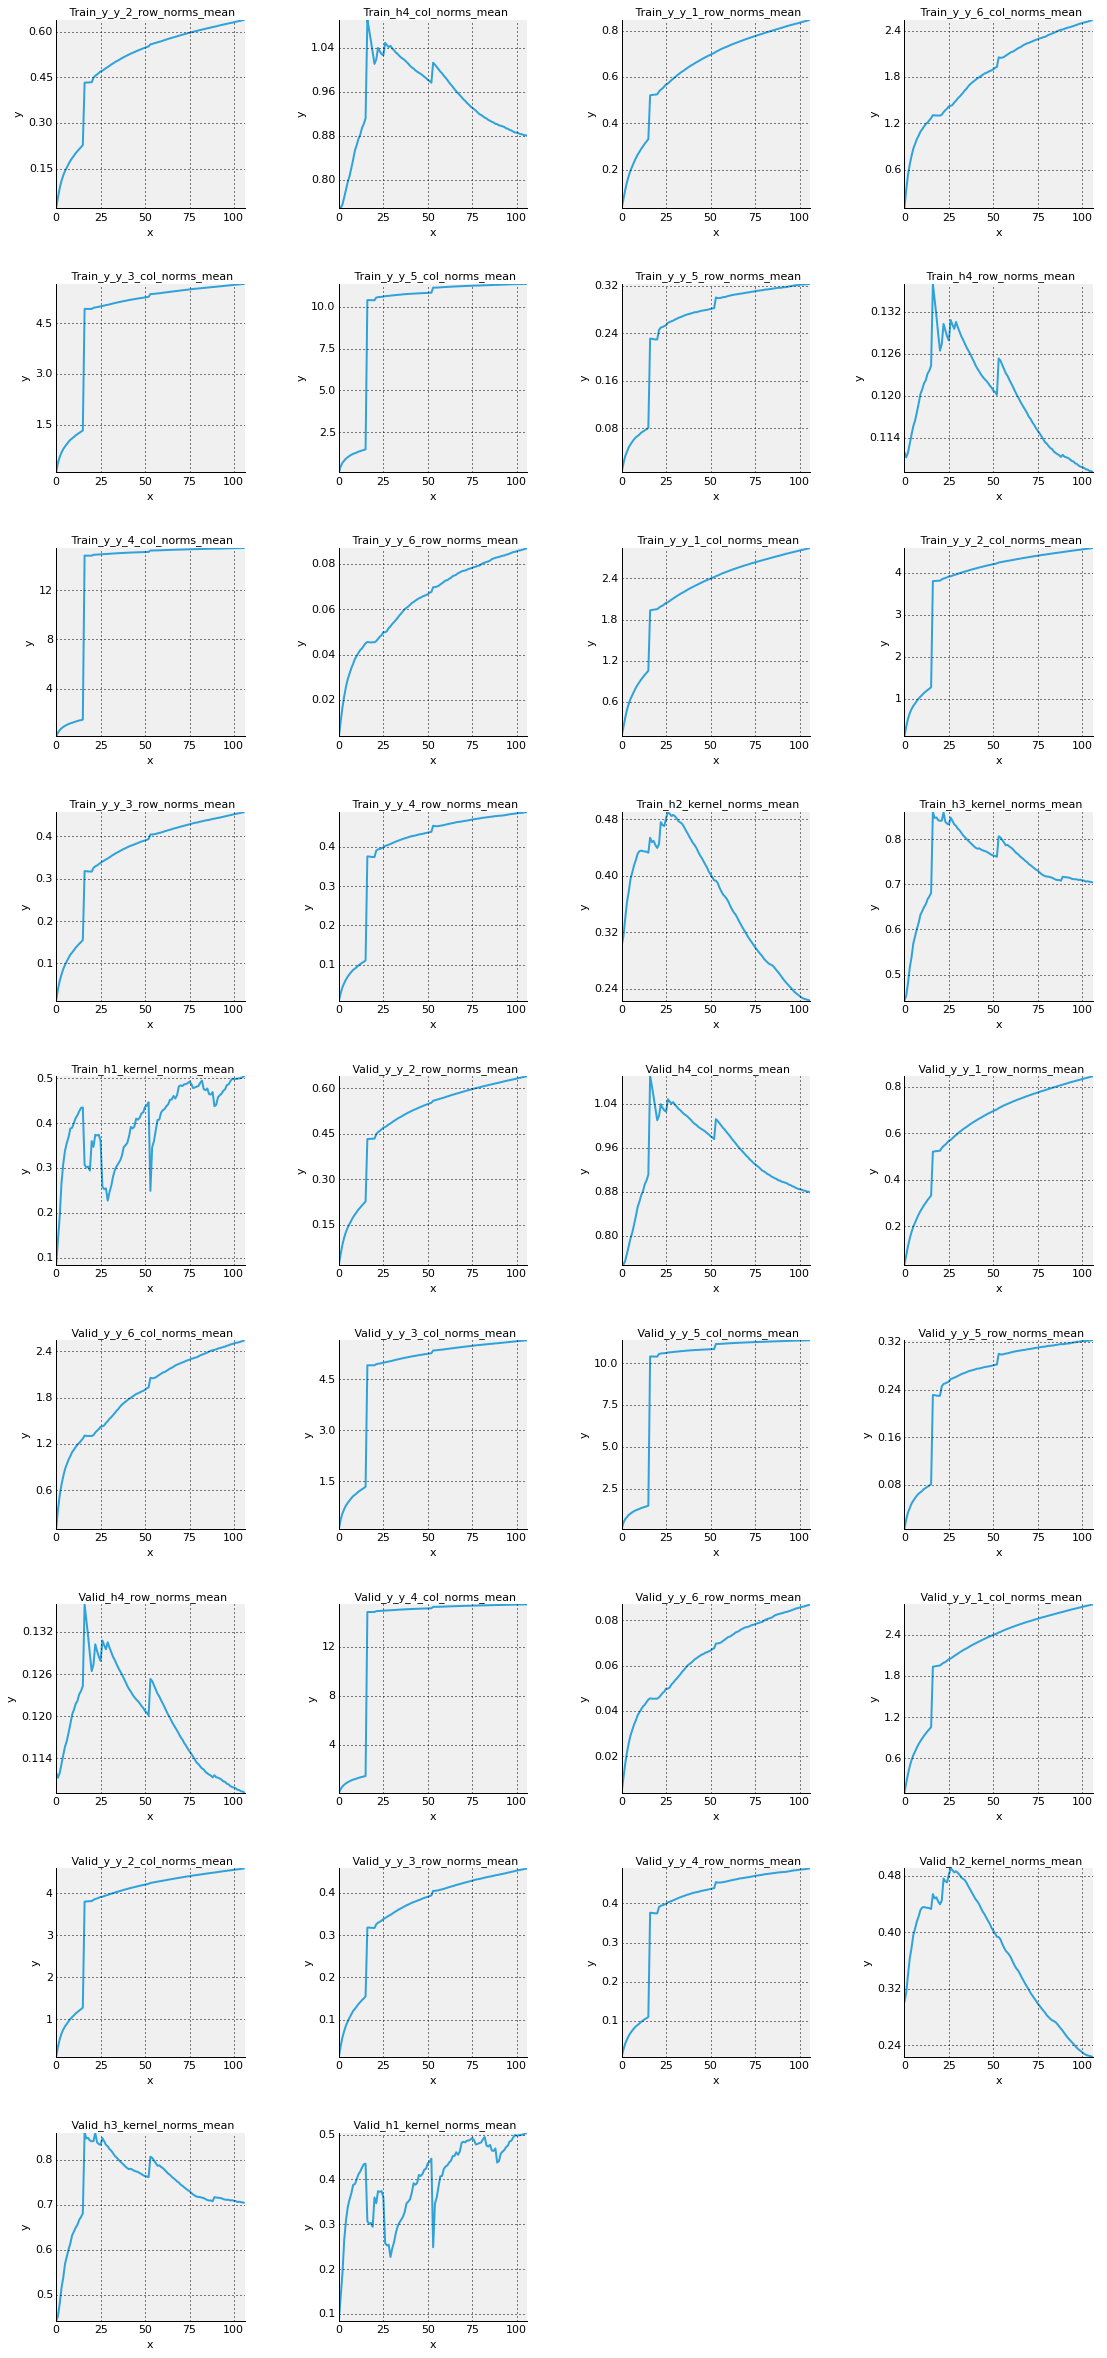

In [182]:
pl.monitor_channels(m_aug, [c for c in m.monitor.channels if "norms_mean" in c], x_axis = "epoch")